In [224]:
# description       : Predict News classification (Text based)
# ML Models used    : Naive bayes
# author            : raulsainz
# email             : 
# date              : 20210327
# version           : 0.1
#==============================================================================

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB #It should be used for features in decimal form. GNB assumes features to follow a normal distribution
from sklearn.naive_bayes import BernoulliNB #It should be used for features with binary or boolean values like True/False or 0/1.
from sklearn.naive_bayes import MultinomialNB #It should be used for the features with discrete values like word count 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk #provides a set of diverse natural languages algorithms, used for tokenizing
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from yellowbrick.text import FreqDistVisualizer
from nltk.probability import FreqDist

* *Bernoulli Naive Bayes* : It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

* *Multinomial Naive Bayes* : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

* *Gaussian Naive Bayes* : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.

In [2]:
#Setup pandas display parameters
pd.options.display.max_columns = 50
pd.options.display.max_rows = 200
pd.options.display.max_colwidth= 100
pd.options.display.precision = 3

In [3]:
#Define initial model parameters
cv_n_split = 3
random_state = 42
test_train_split = 0.25

In [4]:
# Create empty list with models results
model_results = []

In [5]:
df = pd.read_csv('datasets/NewsClassification.csv')

In [6]:
df = df.sample(frac=0.5, replace=True, random_state=1)

In [7]:
df.shape

(60000, 3)

In [8]:
df.head()

,Class Index,Title,Description
98539,1,India cuts troops numbers in Srinagar,"A battalion of Indian Army soldiers has pulled out of Kashmir #39;s summer capital Srinagar, mar..."
77708,1,"VIEW: Muslims, America and Israel Syed Mansoor Hussain","It is extremely important for Muslims, not only those in the US but also elsewhere, to decide wh..."
5192,1,U.S. Vets Make Case for Kerry in Vietnam (AP),AP - Vietnam veterans supporting John Kerry for president made their case Friday in the heart of...
98047,1,Asia-Pacific summit ends with anti-terror pledge,"SANTIAGO (AFP) - Asia-Pacific leaders, overpowered by the US-led quot;war on terror quot; agend..."
50057,3,PolyFuel Announces Breakthrough Technology Advance For Automotive &lt;b&gt;...&lt;/b&gt;,"MOUNTAIN VIEW, CALIF - October 5, 2004 -olyFuel, a world leader in engineered membranes for fuel..."


In [9]:
#Check for null values on all columns
df.isnull().sum(axis = 0)

Class Index    0
Title          0
Description    0
dtype: int64

In [10]:
df['Class Index'].value_counts(normalize=True)

2    0.251
3    0.251
1    0.250
4    0.249
Name: Class Index, dtype: float64

<AxesSubplot:>

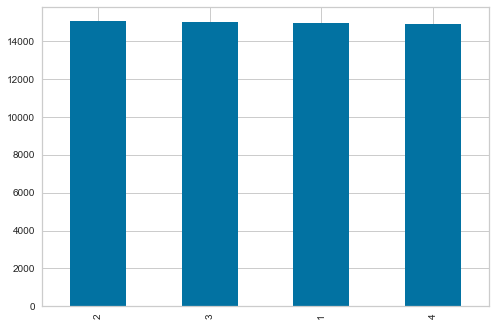

In [11]:
df['Class Index'].value_counts().plot(kind='bar')

In [12]:
#Set Targed variable as category
df['Class Index'] = df['Class Index'].astype('category')


In [13]:
df.dtypes

Class Index    category
Title            object
Description      object
dtype: object

In [14]:
# To Lower
df['Title'] = df['Title'].str.lower()
df['Description'] = df['Description'].str.lower()
df.head()

,Class Index,Title,Description
98539,1,india cuts troops numbers in srinagar,"a battalion of indian army soldiers has pulled out of kashmir #39;s summer capital srinagar, mar..."
77708,1,"view: muslims, america and israel syed mansoor hussain","it is extremely important for muslims, not only those in the us but also elsewhere, to decide wh..."
5192,1,u.s. vets make case for kerry in vietnam (ap),ap - vietnam veterans supporting john kerry for president made their case friday in the heart of...
98047,1,asia-pacific summit ends with anti-terror pledge,"santiago (afp) - asia-pacific leaders, overpowered by the us-led quot;war on terror quot; agend..."
50057,3,polyfuel announces breakthrough technology advance for automotive &lt;b&gt;...&lt;/b&gt;,"mountain view, calif - october 5, 2004 -olyfuel, a world leader in engineered membranes for fuel..."


In [15]:
#Striping punctuation
df['Description'] = df['Description'].str.replace('[{}]'.format(string.punctuation), '') # Removes punctuation
df['Description'] = df['Description'].str.replace('\\'.format(string.punctuation), ' ') # Removes backslash
df['Title'] = df['Title'].str.replace('[{}]'.format(string.punctuation), '') # Removes punctuation
df['Title'] = df['Title'].str.replace('\\'.format(string.punctuation), ' ') # Removes backslash
df.head()

ipykernel_launcher:2: FutureWarning: The default value of regex will change from True to False in a future version.
ipykernel_launcher:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
ipykernel_launcher:4: FutureWarning: The default value of regex will change from True to False in a future version.
ipykernel_launcher:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,Class Index,Title,Description
98539,1,india cuts troops numbers in srinagar,a battalion of indian army soldiers has pulled out of kashmir 39s summer capital srinagar markin...
77708,1,view muslims america and israel syed mansoor hussain,it is extremely important for muslims not only those in the us but also elsewhere to decide whet...
5192,1,us vets make case for kerry in vietnam ap,ap vietnam veterans supporting john kerry for president made their case friday in the heart of ...
98047,1,asiapacific summit ends with antiterror pledge,santiago afp asiapacific leaders overpowered by the usled quotwar on terror quot agenda closed...
50057,3,polyfuel announces breakthrough technology advance for automotive ltbgtltbgt,mountain view calif october 5 2004 olyfuel a world leader in engineered membranes for fuel cell...


In [16]:
df['Title'] = df['Title'].str.replace('[0-9]'.format(string.punctuation), '') # Removes Numbers
df['Description'] = df['Description'].str.replace('[0-9]'.format(string.punctuation), '') # Removes Numbers

ipykernel_launcher:1: FutureWarning: The default value of regex will change from True to False in a future version.
ipykernel_launcher:2: FutureWarning: The default value of regex will change from True to False in a future version.


In [17]:
df['title_sentence_token'] = df['Title'].apply(sent_tokenize)
df['desc_sentence_token']  =  df['Description'].apply(sent_tokenize)
df['title_word_token']  =  df['Title'].apply(word_tokenize)
df['desc_word_token']  =  df['Description'].apply(word_tokenize)

NameError: name 'sent_tokenize' is not defined

In [88]:
df.head()

,Class Index,Title,Description
0,3,wall st bears claw back into the black reuters,reuters shortsellers wall streets dwindling band of ultracynics are seeing green again
1,3,carlyle looks toward commercial aerospace reuters,reuters private investment firm carlyle group which has a reputation for making welltimed and o...
2,3,oil and economy cloud stocks outlook reuters,reuters soaring crude prices plus worries about the economy and the outlook for earnings are ex...
3,3,iraq halts oil exports from main southern pipeline reuters,reuters authorities have halted oil export flows from the main pipeline in southern iraq after ...
4,3,oil prices soar to alltime record posing new menace to us economy afp,afp tearaway world oil prices toppling records and straining wallets present a new economic men...


In [241]:
#Removing Stop Words using NLTK
df['title_word_token'] = df['title_word_token'].apply(lambda words: [word for word in words if word not in stop_words ])
df['desc_word_token'] = df['desc_word_token'].apply( lambda words: [word for word in words if word not in stop_words ])
df.head()

,Class Index,Title,Description,title_sentence_token,desc_sentence_token,title_word_token,desc_word_token
0,3,wall st bears claw back into the black reuters,reuters shortsellers wall streets dwindling band of ultracynics are seeing green again,[wall st bears claw back into the black reuters],[reuters shortsellers wall streets dwindling band of ultracynics are seeing green again],"[wall, st, bears, claw, back, black]","[shortsellers, wall, streets, dwindling, band, ultracynics, seeing, green]"
1,3,carlyle looks toward commercial aerospace reuters,reuters private investment firm carlyle group which has a reputation for making welltimed and o...,[carlyle looks toward commercial aerospace reuters],[reuters private investment firm carlyle group which has a reputation for making welltimed and ...,"[carlyle, looks, toward, commercial, aerospace]","[private, investment, firm, carlyle, group, reputation, making, welltimed, occasionally, controv..."
2,3,oil and economy cloud stocks outlook reuters,reuters soaring crude prices plus worries about the economy and the outlook for earnings are ex...,[oil and economy cloud stocks outlook reuters],[reuters soaring crude prices plus worries about the economy and the outlook for earnings are e...,"[oil, economy, cloud, stocks, outlook]","[soaring, crude, prices, plus, worries, economy, outlook, earnings, expected, hang, stock, marke..."
3,3,iraq halts oil exports from main southern pipeline reuters,reuters authorities have halted oil export flows from the main pipeline in southern iraq after ...,[iraq halts oil exports from main southern pipeline reuters],[reuters authorities have halted oil export flows from the main pipeline in southern iraq after...,"[iraq, halts, oil, exports, main, southern, pipeline]","[authorities, halted, oil, export, flows, main, pipeline, southern, iraq, intelligence, showed, ..."
4,3,oil prices soar to alltime record posing new menace to us economy afp,afp tearaway world oil prices toppling records and straining wallets present a new economic men...,[oil prices soar to alltime record posing new menace to us economy afp],[afp tearaway world oil prices toppling records and straining wallets present a new economic me...,"[oil, prices, soar, alltime, record, posing, new, menace, us, economy, afp]","[afp, tearaway, world, oil, prices, toppling, records, straining, wallets, present, new, economi..."


In [242]:
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['title_word_token'] = df['title_word_token'].apply(lambda words: [stemmer.stem(word) for word in words])
df['desc_word_token'] = df['desc_word_token'].apply(lambda words: [stemmer.stem (word) for word in words])
df.head()

,Class Index,Title,Description,title_sentence_token,desc_sentence_token,title_word_token,desc_word_token
0,3,wall st bears claw back into the black reuters,reuters shortsellers wall streets dwindling band of ultracynics are seeing green again,[wall st bears claw back into the black reuters],[reuters shortsellers wall streets dwindling band of ultracynics are seeing green again],"[wall, st, bear, claw, back, black]","[shortsel, wall, street, dwindl, band, ultracyn, see, green]"
1,3,carlyle looks toward commercial aerospace reuters,reuters private investment firm carlyle group which has a reputation for making welltimed and o...,[carlyle looks toward commercial aerospace reuters],[reuters private investment firm carlyle group which has a reputation for making welltimed and ...,"[carlyl, look, toward, commerci, aerospac]","[privat, invest, firm, carlyl, group, reput, make, welltim, occasion, controversi, play, defens,..."
2,3,oil and economy cloud stocks outlook reuters,reuters soaring crude prices plus worries about the economy and the outlook for earnings are ex...,[oil and economy cloud stocks outlook reuters],[reuters soaring crude prices plus worries about the economy and the outlook for earnings are e...,"[oil, economi, cloud, stock, outlook]","[soar, crude, price, plu, worri, economi, outlook, earn, expect, hang, stock, market, next, week..."
3,3,iraq halts oil exports from main southern pipeline reuters,reuters authorities have halted oil export flows from the main pipeline in southern iraq after ...,[iraq halts oil exports from main southern pipeline reuters],[reuters authorities have halted oil export flows from the main pipeline in southern iraq after...,"[iraq, halt, oil, export, main, southern, pipelin]","[author, halt, oil, export, flow, main, pipelin, southern, iraq, intellig, show, rebel, militia,..."
4,3,oil prices soar to alltime record posing new menace to us economy afp,afp tearaway world oil prices toppling records and straining wallets present a new economic men...,[oil prices soar to alltime record posing new menace to us economy afp],[afp tearaway world oil prices toppling records and straining wallets present a new economic me...,"[oil, price, soar, alltim, record, pose, new, menac, us, economi, afp]","[afp, tearaway, world, oil, price, toppl, record, strain, wallet, present, new, econom, menac, b..."


In [243]:
#Lemmatization of words
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['title_word_token'] = df['title_word_token'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
df['desc_word_token'] = df['desc_word_token'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
df.head()

,Class Index,Title,Description,title_sentence_token,desc_sentence_token,title_word_token,desc_word_token
0,3,wall st bears claw back into the black reuters,reuters shortsellers wall streets dwindling band of ultracynics are seeing green again,[wall st bears claw back into the black reuters],[reuters shortsellers wall streets dwindling band of ultracynics are seeing green again],"[wall, st, bear, claw, back, black]","[shortsel, wall, street, dwindl, band, ultracyn, see, green]"
1,3,carlyle looks toward commercial aerospace reuters,reuters private investment firm carlyle group which has a reputation for making welltimed and o...,[carlyle looks toward commercial aerospace reuters],[reuters private investment firm carlyle group which has a reputation for making welltimed and ...,"[carlyl, look, toward, commerci, aerospac]","[privat, invest, firm, carlyl, group, reput, make, welltim, occasion, controversi, play, defens,..."
2,3,oil and economy cloud stocks outlook reuters,reuters soaring crude prices plus worries about the economy and the outlook for earnings are ex...,[oil and economy cloud stocks outlook reuters],[reuters soaring crude prices plus worries about the economy and the outlook for earnings are e...,"[oil, economi, cloud, stock, outlook]","[soar, crude, price, plu, worri, economi, outlook, earn, expect, hang, stock, market, next, week..."
3,3,iraq halts oil exports from main southern pipeline reuters,reuters authorities have halted oil export flows from the main pipeline in southern iraq after ...,[iraq halts oil exports from main southern pipeline reuters],[reuters authorities have halted oil export flows from the main pipeline in southern iraq after...,"[iraq, halt, oil, export, main, southern, pipelin]","[author, halt, oil, export, flow, main, pipelin, southern, iraq, intellig, show, rebel, militia,..."
4,3,oil prices soar to alltime record posing new menace to us economy afp,afp tearaway world oil prices toppling records and straining wallets present a new economic men...,[oil prices soar to alltime record posing new menace to us economy afp],[afp tearaway world oil prices toppling records and straining wallets present a new economic me...,"[oil, price, soar, alltim, record, pose, new, menac, u, economi, afp]","[afp, tearaway, world, oil, price, toppl, record, strain, wallet, present, new, econom, menac, b..."


In [244]:
df[0:2].Description[1]

'reuters  private investment firm carlyle group which has a reputation for making welltimed and occasionally controversial plays in the defense industry has quietly placed its bets on another part of the market'

In [369]:
#['shortsel', 'wall', street, dwindl, band, ultracyn, see, green]
words = ['shortsellers', 'wall', 'streets', 'dwindling', 'band', 'ultracynics', 'seeing', 'green']
te = list(filter(stop, words))
te = list(map(steam, words))
print(te)


['shortsel', 'wall', 'street', 'dwindl', 'band', 'ultracyn', 'see', 'green']


In [408]:
txt = ['reuters technology shortsellers wall streets dwindling band of ultracynics are seeing green again', 'carlyle looks toward commercial aerospace reuters','oil and economy cloud stocks outlook reuters']

stop  = lambda word: word not in stop_words
steam = lambda word: stemmer.stem(word)
lemma = lambda word: lemmatizer.lemmatize(word)

for line in txt:
    tokenized  = word_tokenize(line)
    print(tokenized)
    new = list(filter(stop, tokenized))
    new = list(map(steam, new))
    #new = list(map(lemma, new))
    print(new)
    print('============')

['reuters', 'technology', 'shortsellers', 'wall', 'streets', 'dwindling', 'band', 'of', 'ultracynics', 'are', 'seeing', 'green', 'again']
['technolog', 'shortsel', 'wall', 'street', 'dwindl', 'band', 'ultracyn', 'see', 'green']
['carlyle', 'looks', 'toward', 'commercial', 'aerospace', 'reuters']
['carlyl', 'look', 'toward', 'commerci', 'aerospac']
['oil', 'and', 'economy', 'cloud', 'stocks', 'outlook', 'reuters']
['oil', 'economi', 'cloud', 'stock', 'outlook']


In [21]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['reuters'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop  = lambda word: word not in stop_words
steam = lambda word: stemmer.stem(word)
def mytokenizer(sentence):
    tokens = word_tokenize(sentence)
    #print(tokens)
    new = list(filter(stop, tokens))
    new = list(map(steam, new))
    return new

In [23]:
# Full document-term matrix for title
cv = CountVectorizer(tokenizer=mytokenizer)
dtm_title = cv.fit_transform(df.Title) #Document term matrix for title
title_names = cv.get_feature_names() # Get feature names
dtm_title

<60000x18208 sparse matrix of type '<class 'numpy.int64'>'
	with 317167 stored elements in Compressed Sparse Row format>

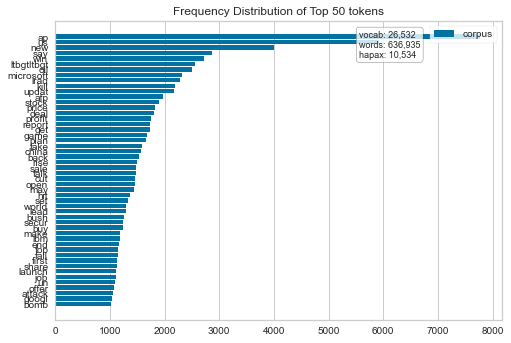

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [92]:
#Create word distribution plot
visualizer = FreqDistVisualizer(features=title_names, orient='h')
visualizer.fit(dtm_title)
visualizer.show()

In [24]:
# Full document-term matrix for description
cv = CountVectorizer(tokenizer=mytokenizer)
dtm_desc = cv.fit_transform(df.Description) #Document term matrix for description
desc_names = cv.get_feature_names() # Get feature names
dtm_desc

<60000x36945 sparse matrix of type '<class 'numpy.int64'>'
	with 1116720 stored elements in Compressed Sparse Row format>

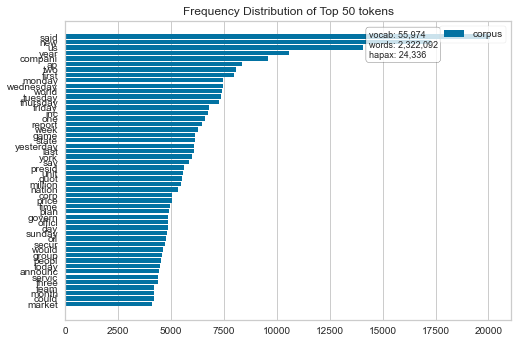

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [94]:
visualizer = FreqDistVisualizer(features=desc_names, orient='h')
visualizer.fit(dtm_desc)
visualizer.show()

In [25]:
# Create Document Matrix
DocumentMatrix_title = pd.DataFrame(dtm_title.toarray(), columns=title_names)
DocumentMatrix_desc = pd.DataFrame(dtm_desc.toarray(), columns=desc_names)
print(DocumentMatrix_title.shape)
print(DocumentMatrix_desc.shape)

(60000, 18208)
(60000, 36945)


In [35]:
uni = pd.DataFrame({ 
            'unicos':DocumentMatrix_title.nunique(),
})
uni[uni.unicos>2]

,unicos
african,3
call,3
cut,3
face,3
may,3
new,3
oil,3
record,3
us,3


In [36]:
DocumentMatrix_title.us.unique()

array([0, 1, 2])

# Model #1 - Multinomial NB on Title (count)

In [26]:
#Split the data into DV and IV's
X = DocumentMatrix_title
y = df['Class Index']
print(X.shape)
print(y.shape)


(60000, 18208)
(60000,)


In [27]:
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=random_state)

In [28]:
X_train.shape

(45000, 18208)

Accuracy = 0.9002
ROC_AUC = 0.9332600195439317
              precision    recall  f1-score   support

           1    0.91058   0.88892   0.89962      3700
           2    0.94573   0.97147   0.95843      3821
           3    0.85957   0.87767   0.86852      3752
           4    0.88354   0.86101   0.87213      3727

    accuracy                        0.90020     15000
   macro avg    0.89985   0.89977   0.89967     15000
weighted avg    0.90005   0.90020   0.89999     15000



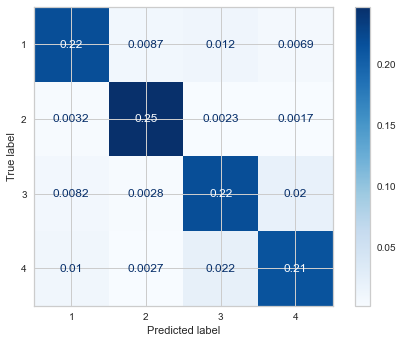

In [44]:
#Create a Multinomial Naive Bayes Classifier
model_nb1 = MultinomialNB()
model_rf, roc_auc_rf = run_model(model_nb1, X_train, y_train, X_test, y_test,desc='MultinomialNB - Title')

# Model #2 - Multinomial NB on Description (count)

In [45]:
#Split the data into DV and IV's
X = DocumentMatrix_desc
y = df['Class Index']
print(X.shape)
print(y.shape)

(60000, 36945)
(60000,)


In [46]:
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=random_state)

In [47]:
#Create a Multinomial NB
model_nb2 = MultinomialNB()

Accuracy = 0.9010666666666667
ROC_AUC = 0.9338331649145366
              precision    recall  f1-score   support

           1    0.91349   0.88757   0.90034      3700
           2    0.94467   0.97409   0.95915      3821
           3    0.86642   0.87473   0.87056      3752
           4    0.87789   0.86611   0.87196      3727

    accuracy                        0.90107     15000
   macro avg    0.90062   0.90063   0.90050     15000
weighted avg    0.90081   0.90107   0.90082     15000



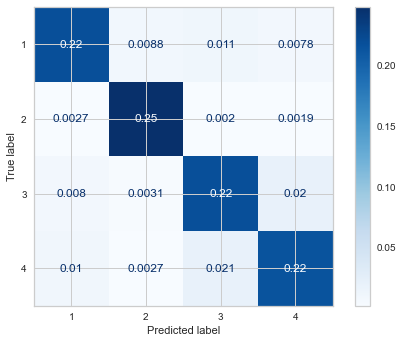

In [48]:
model_rf, roc_auc_rf = run_model(model_nb2, X_train, y_train, X_test, y_test,desc='MultinomialNB - Description')

# Model # 3 Bernoulli NB on title(bool)

In [49]:
DocumentMatrix_title.sum().sort_values(ascending=False)

ap              3943
us              2946
new             1986
say             1392
win             1323
                ... 
logidex            1
logiclibrari       1
logger             1
loftier            1
zy                 1
Length: 18208, dtype: int64

In [50]:
DocumentMatrix_title_bool = DocumentMatrix_title.apply(lambda x: [True if y >0 else False for y in x])
DocumentMatrix_desc_bool = DocumentMatrix_desc.apply(lambda x: [True if y >0 else False for y in x])
DocumentMatrix_title_bool.head()

KeyboardInterrupt: 

In [ ]:
#Split the data into DV and IV's
X = DocumentMatrix_title_bool
y = df['Class Index']
print(X.shape)
print(y.shape)
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=random_state)
#Create a Gaussian Classifier
model_nb3 = BernoulliNB()
model_rf, roc_auc_rf = run_model(model_nb3, X_train, y_train, X_test, y_test,desc='BernoulliNB - Title')

# Model #4 Bernoulli NB on desc(bool)

In [ ]:
#Split the data into DV and IV's
X = DocumentMatrix_desc_bool
y = df['Class Index']
print(X.shape)
print(y.shape)
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=random_state)
#Create a BernoulliNB Classifier
model_nb4 = BernoulliNB()
model_rf, roc_auc_rf = run_model(model_nb4, X_train, y_train, X_test, y_test,desc='BernoulliNB - Desc')

# Model 5 - Multinomial NB on title TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(dtm_title)
tfidf = tfidf_transformer.transform(dtm_title)

In [ ]:
# Create Document Matrix
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=title_names,columns=["idf_weights"])
#DocumentMatrix_title = pd.DataFrame(x.toarray(), columns=title_names)
df_idf.head()
#print(DocumentMatrix_title.shape)

In [ ]:
df_tfidf_title = pd.DataFrame(tfidf.toarray(), columns=title_names)
df_tfidf_title[df_title['new']>0]['new']

In [ ]:
#Split the data into DV and IV's
X = df_tfidf_title
y = df['Class Index']
print(X.shape)
print(y.shape)
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=random_state)
#Create a BernoulliNB Classifier
model_nb5 = MultinomialNB()
model_rf, roc_auc_rf = run_model(model_nb5, X_train, y_train, X_test, y_test,desc='MultinomialNB - Title Tfid')

# Model 6 - Multinomial NB on desc TFIDF

In [ ]:
fidf_transformer = TfidfTransformer()
tfidf_transformer.fit(dtm_desc)
tfidf = tfidf_transformer.transform(dtm_desc)
df_tfidf_desc = pd.DataFrame(tfidf.toarray(), columns=desc_names)
df_tfidf_desc.head()

In [ ]:
#Split the data into DV and IV's
X = df_tfidf_desc
y = df['Class Index']
print(X.shape)
print(y.shape)
#split into raining and test
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=random_state)
#Create a BernoulliNB Classifier
model_nb6 = MultinomialNB()
model_rf, roc_auc_rf = run_model(model_nb6, X_train, y_train, X_test, y_test,desc='Multinomial - Desc Tfid')

In [ ]:

freqs = zip(cv.get_feature_names(), bow_title.sum(axis=0))    
# sort from largest to smallest
sorted(freqs, key=lambda x: -x[1])

In [ ]:
# Create Document Matrix
DocumentMatrix_title = pd.DataFrame(bow_title.toarray(), columns=title_names)
DocumentMatrix_desc = pd.DataFrame(bow_desc.toarray(), columns=desc_names)
print(DocumentMatrix_title.shape)
print(DocumentMatrix_desc.shape)

In [32]:
sum_words_title = bow_title.sum(axis=0)
words_freq_title = [(word, sum_words_title[0, idx]) for word, idx in     cv.vocabulary_.items()]
words_freq_title = sorted(words_freq_title, key = lambda x: x[1], reverse=True)
print(words_freq_title[:10])

IndexError: index 4858 is out of bounds for axis 1 with size 2848

In [ ]:
sum_words_desc = bow_desc.sum(axis=0)
words_freq_desc = [(word, sum_words_desc[0, idx]) for word, idx in     cv.vocabulary_.items()]
words_freq_desc = sorted(words_freq_desc, key = lambda x: x[1], reverse=True)
print("{} in description".format(sum_words_desc))

In [102]:
from sklearn.feature_extraction.text  import TfidfTransformer 
#Full document-term matrix for title
cv = CountVectorizer(tokenizer=mytokenizer)
tdm_title = cv.fit_transform(df.Title) #Get term document matrix
title_names = cv.get_feature_names() # Get feature names

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(tdm_title)
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=title_names,columns=["weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['weights'])





,weights
ap,3.787
us,3.886
new,4.353
ltbgtltbgt,4.594
oil,4.690
...,...
iaea,7.398
ice,7.398
ichiro,7.398
hussein,7.398


In [103]:
# count matrix 
count_vector=cv.transform(df.Title) 
 
# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [106]:
feature_names = cv.get_feature_names() 
 
#get tfidf vector for first document 
first_document_vector=tf_idf_vector[0] 
 
print(first_document_vector)

  (0, 2599)	0.43832355179560434
  (0, 2369)	0.5147699951158982
  (0, 1706)	0.4865558874410917
  (0, 1210)	0.40277797989860387
  (0, 563)	0.3793647102392048


In [107]:
#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
srinagar,0.515
number,0.487
troop,0.438
india,0.403
cut,0.379
...,...
freez,0.000
french,0.000
freshman,0.000
fret,0.000


In [448]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [42]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True,desc='myModel'):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test) #Predict the response for test dataset
    roc_auc = multi_roc_auc_score(y_test, y_pred)
    model_acc = metrics.accuracy_score(y_test, y_pred )  # Model Accuracy, how often is the classifier correct?
    print("Accuracy = {}".format(model_acc))   
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    model_results.append({'Model':desc,'ROC_AUC':roc_auc,'Acuracy':model_acc})
    return model, roc_auc

In [43]:
def multi_roc_auc_score(y_test,y_pred,average='macro'):
    labels = preprocessing.LabelBinarizer()
    labels.fit(y_test)
    y_test = labels.transform(y_test)
    y_pred = labels.transform(y_pred)
    return roc_auc_score(y_test, y_pred,average=average)